# Clean And Analyze Employee Exit Surveys

This project is to investigate exit surveys using the Australian databases for Exit Surveys. 

$$   $$

We will be using vectorized string methods to aid the data cleaning:

>Transformative vectorized methods:
- apply(), map(), apply map ()

>Delete / Devalue vectorized methods:
- fillna(), dropna(), drop()

>Reshaping vectorized method:
- melt()

>Combining vectorized methods:
- concat(), merge()

The Technical and Further Education (TAFE) institute data is [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

The Department of Education, Training and Employment (DETE) data is [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

### Loading in the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#The database uses Not Stated for its null values. Python works best with NaN so we will also convert this#
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv", na_values = "Not Stated")

In [3]:
pd.options.display.max_columns = None
print("The DETE database contains ", dete_survey.shape[0], " rows and ", dete_survey.shape[1] , " columns")
print()
dete_survey.info()
print()
dete_survey.head()

The DETE database contains  822  rows and  56  columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
print("The TAFE database contains ", tafe_survey.shape[0], " rows and ", tafe_survey.shape[1] , " columns")
print()
tafe_survey.info()
tafe_survey.head()

The TAFE database contains  702  rows and  72  columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                    

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

Lets see how many null values we have.

In [5]:
dete_survey.isnull().sum().sort_values()

ID                                       0
Workload                                 0
Work life balance                        0
Traumatic incident                       0
Ill Health                               0
Study/Travel                             0
Relocation                               0
Maternity/family                         0
Employment conditions                    0
Work location                            0
Lack of job security                     0
Lack of recognition                      0
Physical work environment                0
Dissatisfaction with the department      0
None of the above                        0
Interpersonal conflicts                  0
Career move to private sector            0
Career move to public sector             0
Job dissatisfaction                      0
SeparationType                           0
Employment Status                        5
Position                                 5
Physical environment                     5
Information

In [6]:
tafe_survey.isnull().sum().sort_values()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
Reason for ceasing employment                                                                                                                                      1
CESSATION YEAR                                                                                                                                                     7
Induction. Did you undertake Workplace Induction?                                                                                                                 83
InstituteV

Dete survey is 822 entries by 56 columns. 7 columns have a large amount of rows missing (respectively 367, 696,790,799,806,815,819)

Tafe survey is 702 entries by 72 columns. 12 columns have 265 rows missing.
In total 4 extra columns have >200 rows missing (219,262,270,589)
Time for some investigation and clean up.

Below we have used Seaborn's heatmap visualisation to show the NaN value (in dark colour) for each column.

This graphic is large, right click and view the image in another tab


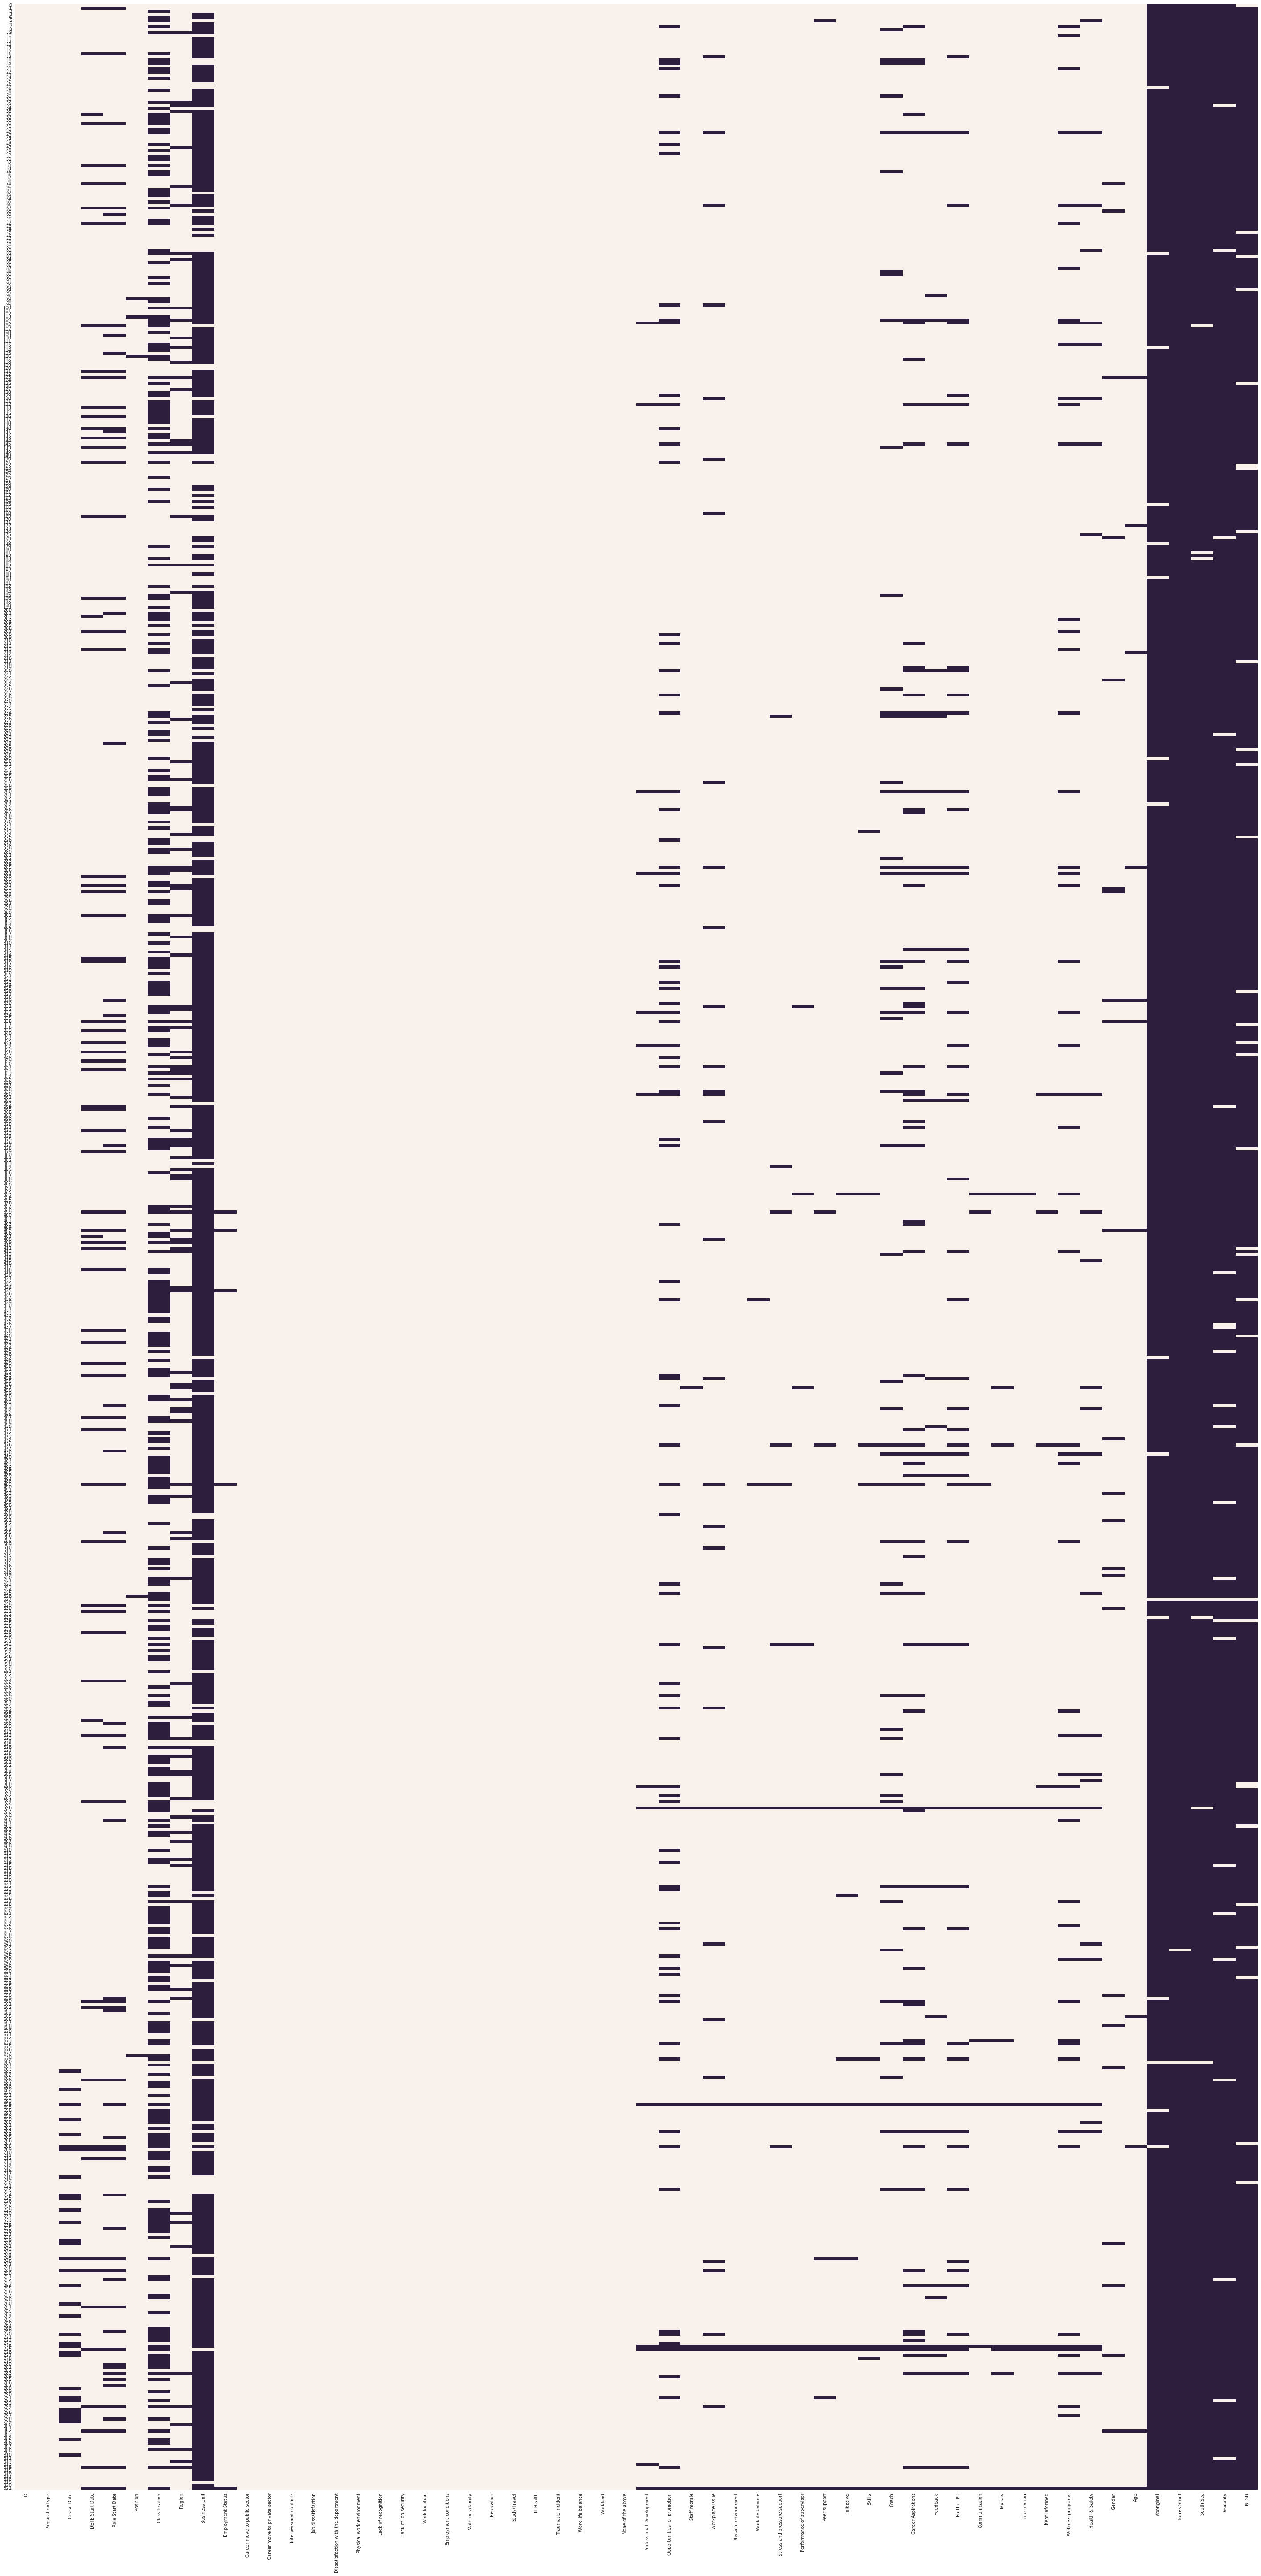

In [ ]:
plt.figure(figsize=(50,100))
sns.heatmap(dete_survey.isnull(), cbar=False)
print("This graphic is large, right click and view the image in another tab")
plt.show()

In [ ]:
plt.figure(figsize=(50,100))
sns.heatmap(tafe_survey.isnull(), cbar=False)
print("This graphic is large, right click and view the image in another tab")
plt.show()

### Data Cleaning

First lets remove columns that we wont be using our resignation investigation.

Here are the columns to remove.

In [ ]:
dete_survey.columns[28:49].tolist()

In [ ]:
tafe_survey.columns[17:66].tolist()

The dataframe.drop() method allows columns (or rows) to be removed. (Axis = 1 is used for columns, Axis = 0 for rows)

In [ ]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [ ]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66] ,axis =1)

Next we need to harmonise the names to allow merging of the databases.

In [ ]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

In [ ]:
dete_survey_updated.columns

Further renaming of columns.

In [ ]:
renaming_tafe_map = {"Record ID" : "id", "CESSATION YEAR": "cease_date",'CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service','LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey
tafe_survey_updated = tafe_survey.rename(columns =renaming_tafe_map)
tafe_survey_updated.head()

In [ ]:
print("Dete Survey")
print(dete_survey_updated.columns.tolist())
print()
print("Tafe Survey")
print(tafe_survey_updated.columns.tolist())

Next we shall look at the different separation types.

In [ ]:
dete_survey_updated["separationtype"].value_counts()

In [ ]:
tafe_survey_updated["separationtype"].value_counts()

We are only interested in the resignation types in this project.
Lets create new tables to show only data with resignations.

In [ ]:
dete_filter = (dete_survey_updated["separationtype"] == "Resignation-Other reasons") | (dete_survey_updated["separationtype"] == "Resignation-Other employer") | (dete_survey_updated["separationtype"] == "Resignation-Move overseas/interstate")
dete_resignations = dete_survey_updated[dete_filter].copy()

In [ ]:
tafe_resignations = tafe_survey_updated[(tafe_survey_updated["separationtype"] == "Resignation")].copy()
tafe_resignations

Now lets preview the leaving dates

In [ ]:
dete_resignations["cease_date"].value_counts()

In [ ]:
tafe_survey_updated["separationtype"].value_counts()

In [ ]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract("\d?\d?/?(\d{4})")

In [ ]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)

In [ ]:
dete_resignations["cease_date"].value_counts()

In [ ]:
dete_resignations["dete_start_date"].value_counts()

In [ ]:
tafe_resignations["cease_date"].value_counts()

### Visualising The Start and Finish Dates

A good way to show the distribution of data is a boxplot.

Recap of how to read a boxplot
- The most lower and upper horizontal lines encompass all the data (excluding outliers)
- The bottom to the top of the box represent data between the 25th percentile and the 75th percentile. (So this box represents where 50% of the data lies)
- The red line represents the 50% Percentile.

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(2,1,1)
print("Dete Cease Date Boxplot")
dete_resignations.boxplot(column=["cease_date"])
fig.add_subplot(2,1,2)

tafe_resignations.boxplot(column=["cease_date"])
plt.show()
print("Tafe Cease Date Boxplot")


In [ ]:
dete_resignations['dete_start_date'].plot(kind='box')

In [ ]:
dete_resignations['cease_date'].plot(kind='box')

Start dates are more varied, as would be expected.

A huge majority of people are leaving in 2012 to 2014.

Perhaps records were only recorded from those dates onwards. 
Or perhaps people who have been there along time stayed for along time until an event at 2012.

### Length of Service

Next lets create a column showing the length of employment. We shall call this the institute_service.

In [ ]:
#Not strictly required here but np.nan fill the column with not a number in the event that no value gets assigned#
dete_resignations["institute_service"] = np.nan
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

In [ ]:
dete_resignations["institute_service"].plot(kind='box')

In [ ]:
print("The number of people leaving in the Dete Data set is", dete_resignations["institute_service"].value_counts().sum())

ten_years_or_less = dete_resignations[dete_resignations["institute_service"] <= 10]
print("The number of people leaving within 10 years is", ten_years_or_less["institute_service"].value_counts().sum())

seven_years_or_less = dete_resignations[dete_resignations["institute_service"] <= 7]
print("The number of people leaving within 7 years is", seven_years_or_less["institute_service"].value_counts().sum())

three_years_or_less = dete_resignations[dete_resignations["institute_service"] <= 3]
print("The number of people leaving within 3 years is", three_years_or_less["institute_service"].value_counts().sum())

- 63% of people leaving within 10 years.
- 53% leave within 7 years.
- 28% leave within 3 years.

There is a real problem here with short term workers.

### Employee Dissatisfaction

Our aim in this project is to review causes of resignations.
Lets preview the Tafe resignation resignations factors

In [ ]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

In [ ]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

The values are not in a very user friendly format. The '-' here represents a 'no' response.

Lets update this to True and False where applicable to allow easy processing.

In [ ]:
#Create a method for updating the values#
def update_vals(x):
    if x == '-':
        return False
    #If null then set as nan#
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [ ]:
#Apply the method to the columns. Then store this as a dissatisfied column#
#Need to select skipna as False as we want to apply the function to null also#
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)

In [ ]:
tafe_resignations["dissatisfied"].value_counts(dropna=False)

In [ ]:
#create a copy of the database#
tafe_resignations_up = tafe_resignations.copy()

Excellent we now have a new dissatisfied column. We can see that 91 people from the Tafe resignations were dissatisfied.

Now lets repeat the process for the Dete resignations.

In [ ]:
dete_resignations["dissatisfied"] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition',]].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [ ]:
dete_resignations["dissatisfied"].value_counts(dropna=False)

### Joining The Datasets

To be able to join the datasets, first we can add labels to the data so we can in the future review where each row originated.

In [ ]:
#create an institure column and label with the respective database#
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

Next we can join the two data sets.

The Pandas function 'concat' joins two tables together.

In [ ]:
#axis = 0 to join rows to rows
#ignore_index to avoid indexing confusion with joining#
#concat by default uses an 'outer' join, i.e. all data from both tables is preserved#
combined = pd.concat([tafe_resignations_up, dete_resignations_up], axis=0, ignore_index=True)
combined.head()

### Removing Columns With Excessive Null Values

As all the data from both datasets is here we can see we have alot of Nan values.

Here is a preview of the mangnitude of the non-missing value columns.

In [ ]:
sorted_nulls = sorted(combined.notnull().sum(),reverse=True)
print("The columns have the following non-null values:")
print(sorted_nulls)

Next step is to set a cut-off for columns to be dropped. 

Lets remove columns with less than 500 non-null values.

The pandas 'dropna' method will allow this.

In [ ]:
#Thresh sets a lower limit. Here it will require 500 non-null values or else the column is dropped#
#Axis is by default set to 0. Set axis to 1 to select columns#
combined_up = combined.dropna(thresh = 500 , axis=1)
#add a check to see it worked
sorted_nulls = sorted(combined_up.notnull().sum(),reverse=True)
print("The remaining columns have the following non-null values:")
print(sorted_nulls)
combined_up.head()

### Sorting The Length of Service Into Career Stages

Next lets preview the institute_service column.

In [ ]:
institute_types = {}
for row in combined_up["institute_service"]:
    if type(row) in institute_types:
        institute_types[type(row)] += 1
    else:
        institute_types[type(row)] = 1
print(institute_types)

We have a mixture of file types here. Lets set these as strings to begin with.

In [ ]:
combined_up["institute_service"] = combined_up["institute_service"].astype("str")
combined_up["institute_service"].value_counts(dropna=False)

Next lets use 'Regex' (regular expression) to capture the year from these strings.

We will also convert the values back to float to allow for numerical processing

In [ ]:
#Set the regex to select the first one or two numbers it sees#
#Some entries have a range (like 11-20) we will deal with later#
years = r'([0-9]?[0-9])'
#str.extract uses Regex capture groups to overwrite the column#
combined_up['institute_service'] = combined_up['institute_service'].str.extract(years, expand=False).astype(float)
combined_up['institute_service'].value_counts(dropna=False)

We should be conscious of the data we have just formatted. We had values of 
- 1-2
- 3-4
- 5-6
- 7-10
- 11-20

This was processed to give 1,3,5,7,11.

Next we will set ranges for the service lengths to give an idea of the employees career stage when they left. Let:
- <3 years be 'New'
- 3-6 years be 'Experienced'
- 7-10 years be 'Established'
- 11+ years be 'Veteran'

(null values will be returned as 'No Data')

Now lets apply this to the years. To preserve the original data we will create a new column called service_cat.

In [ ]:
def years_worked(x):
    if pd.isnull(x):
        return "No Data"
    elif x < 3:
        return "New"
    elif x < 7:
        return "Experienced"
    elif x < 11:
        return "Established"
    else:
        return "Veteran"
combined_up["service_cat"] =combined_up["institute_service"].apply(years_worked).copy()

In [ ]:
combined_up["service_cat"].value_counts()

### Dissatisfaction Vs Length Of Service

Next lets preview how many people answered that they were dissatisfied

In [ ]:
combined_up['dissatisfied'] = combined_up['dissatisfied'].fillna(False)
combined_up['dissatisfied'].value_counts()

We can then create a pivot table.

Pivot tables are short statistical tables.
Pivot tables by default in pandas use the aggregation and calculate the 'mean' for each group (called the 'index' here)

In [ ]:
#Only interested in the dissatisfied column so set this to values#
com_piv = combined_up.pivot_table(values = 'dissatisfied', index = 'service_cat')
com_piv

In [ ]:
ax = com_piv.plot(kind ="barh")
ax.set_title("Correlation Between Length Of Service and Share Dissatisfied")
ax.set_xlabel("Share of Workers Dissatisfied")
ax.set_ylabel("Length Of Service")

- The highest dissatisfaction is with Established workers (7 to 11 years).
- Then the Veteran workers (11+ years). 
- Then the New workers (<3 years).
- Then the Experienced (3-7 years).

### Dissatisfaction Vs Age

Next lets preview the age groups

In [ ]:
print(combined_up['age'].value_counts(dropna=False))

In [ ]:
age_types = {}
for row in combined_up["age"]:
    if type(row) in age_types:
        age_types[type(row)] += 1
    else:
        age_types[type(row)] = 1
print(institute_types)

Another mixture of float and string types. 

We shall repeat the same methodology as before to extract the age.

In [ ]:
#Set values as string type#
#Replace the double space denoting a range with '-'#
combined_up["age"] = combined_up["age"].astype(str).str.replace("  ","-")

In [ ]:
print(combined_up['age'].value_counts(dropna=False))

In [ ]:
#Remove the 'or older'.#
#We shall simply all these values (and 56-60) with 56 or older#
def age_brackets(value):
    if (value == '61 or older') or (value == '56-60'):
        return '56 or older'
    elif value == 'nan':
        #set to nan values
        return np.nan
    else:
        return value
    
#Then use this function to form a new column 'age ranges'.
combined_up['age_ranges'] = combined_up['age'].apply(age_brackets)

In [ ]:
age_piv = combined_up.pivot_table(values = 'dissatisfied', index = 'age_ranges')
age_piv

In [ ]:
ax2 = age_piv.plot(kind ="barh")
ax2.set_title("Correlation Between Age and Share Dissatisfied")
ax2.set_xlabel("Share of Workers Dissatisfied")
ax2.set_ylabel("Age")

### Conclusions
There is a mixture of information here.

For Dissatisfaction Vs Service Length:
- The highest dissatisfaction is with Established workers (7 to 11 years).
- Then the Veteran workers (11+ years). 
- Then the New workers (<3 years).
- Then the Experienced (3-7 years).

Therefore in general there is more dissatisfaction with the long term workers (7+years) than not but as dissatisfaction is higher in the 7 to 11 years suggests there are some additional unknown factors.

For Dissatistfaction Vs Age:
- The most dissatisfied age groups are the oldest.
- The 20 or younger group is the most satisfied.
